In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')
import os
import nltk


In [3]:
data = pd.read_csv('alexa.tsv', delimiter = '\t', quoting = 3)
data.shape,data.ndim,data.size

((3150, 5), 2, 15750)

In [4]:
data.columns.values[-1]="Reviews"
data

,rating,date,variation,verified_reviews,Reviews
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"""Perfect for kids, adults and everyone in betw...",1
3146,5,30-Jul-18,Black Dot,"""Listening to music, searching locations, chec...",1
3147,5,30-Jul-18,Black Dot,"""I do love these things, i have them running m...",1
3148,5,30-Jul-18,White Dot,"""Only complaint I have is that the sound quali...",1


In [5]:
data.describe()

,rating,Reviews
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [6]:
data.info

<bound method DataFrame.info of       rating       date         variation  \
0          5  31-Jul-18  Charcoal Fabric    
1          5  31-Jul-18  Charcoal Fabric    
2          4  31-Jul-18    Walnut Finish    
3          5  31-Jul-18  Charcoal Fabric    
4          5  31-Jul-18  Charcoal Fabric    
...      ...        ...               ...   
3145       5  30-Jul-18        Black  Dot   
3146       5  30-Jul-18        Black  Dot   
3147       5  30-Jul-18        Black  Dot   
3148       5  30-Jul-18        White  Dot   
3149       4  29-Jul-18        Black  Dot   

                                       verified_reviews  Reviews  
0                                         Love my Echo!        1  
1                                             Loved it!        1  
2     "Sometimes while playing a game, you can answe...        1  
3     "I have had a lot of fun with this thing. My 4...        1  
4                                                 Music        1  
...                      

In [7]:
data.groupby('rating').describe()

Reviews                                   
         count mean  std  min  25%  50%  75%  max
rating                                           
1        161.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2         96.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3        152.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
4        455.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
5       2286.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0

In [8]:
data.groupby('Reviews').describe()

rating                                             
          count      mean       std  min  25%  50%  75%  max
Reviews                                                     
0         257.0  1.373541  0.484688  1.0  1.0  1.0  2.0  2.0
1        2893.0  4.737643  0.546544  3.0  5.0  5.0  5.0  5.0

In [9]:
data['length'] = data['verified_reviews'].apply(len)
data.head()

,rating,date,variation,verified_reviews,Reviews,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [10]:
data.length.describe()

count    3150.000000
mean      132.673651
std       182.526953
min         1.000000
25%        30.000000
50%        74.000000
75%       166.000000
max      2853.000000
Name: length, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F96F6EE948>,
      dtype=object)

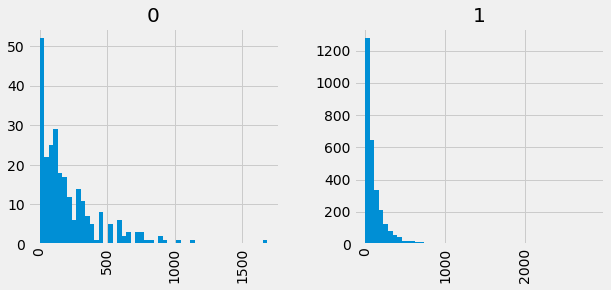

In [11]:
data.hist(column='length', by='Reviews', bins=50,figsize=(10,4))


In [12]:
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

In [13]:
ratings = data['rating'].value_counts()

label_rating = ratings.index
size_rating = ratings.values

colors = ['pink', 'lightblue', 'aqua', 'gold', 'crimson']

rating_piechart = go.Pie(labels = label_rating,
                         values = size_rating,
                         marker = dict(colors = colors),
                         name = 'Alexa', hole = 0.3)
df = [rating_piechart]

layout = go.Layout(title = 'Distribution of Ratings for Alexa')

fig = go.Figure(data = df,
                 layout = layout)

py.iplot(fig)

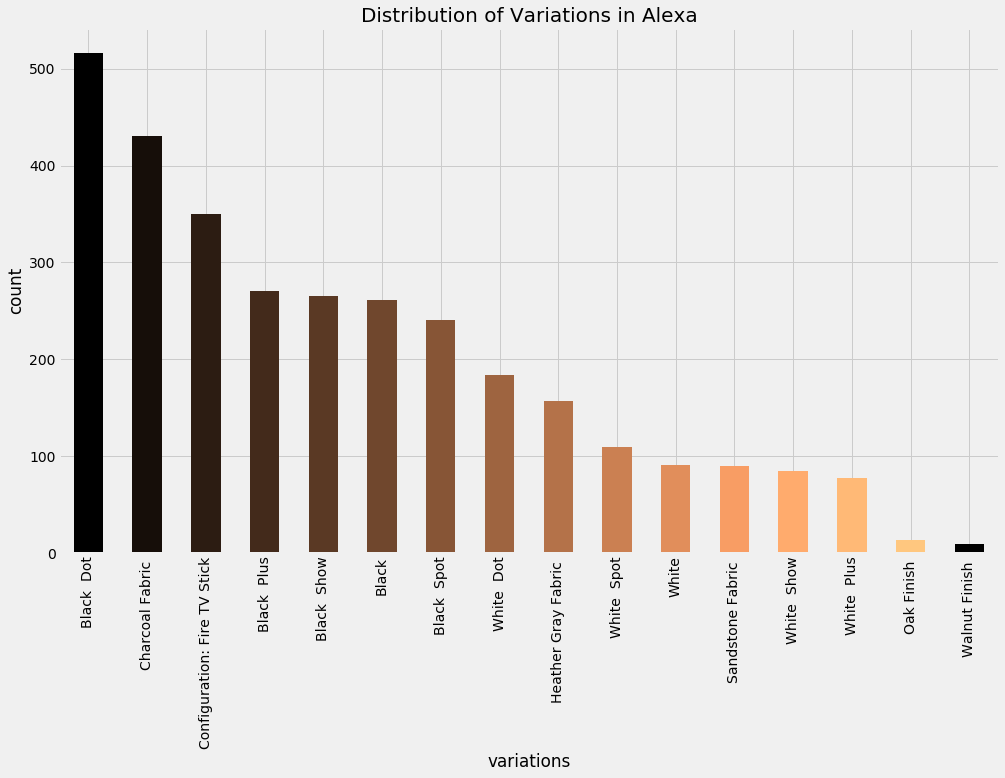

In [14]:
color = plt.cm.copper(np.linspace(0, 1, 15))
data['variation'].value_counts().plot.bar(color = color, figsize = (15, 9))
plt.title('Distribution of Variations in Alexa', fontsize = 20)
plt.xlabel('variations')
plt.ylabel('count')
plt.show()

In [15]:
Reviews = data['Reviews'].value_counts()

label_Reviews = Reviews.index
size_Reviews = Reviews.values

colors = ['yellow', 'lightgreen']

Reviews_piechart = go.Pie(labels = label_Reviews,
                         values = size_Reviews,
                         marker = dict(colors = colors),
                         name = 'Alexa', hole = 0.3)

df2 = [Reviews_piechart]

layout = go.Layout( title = 'Distribution of Reviews for Alexa')

fig = go.Figure(data = df2,
                 layout = layout)

py.iplot(fig)

In [70]:
data['Reviews']

0       1
1       1
2       1
3       1
4       1
       ..
3145    1
3146    1
3147    1
3148    1
3149    1
Name: Reviews, Length: 3150, dtype: int64

In [17]:
data[data['length'] == 1]['verified_reviews'].iloc[0]

'😍'

In [18]:
data[data['length'] == 21]['verified_reviews'].iloc[0]

'Good sound works well'

In [19]:
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()


def explain_text_entities(text):
    doc = nlp(text)
    for ent in doc.ents:
        print(f'Entity: {ent}, Label: {ent.label_}, {spacy.explain(ent.label_)}')
        
for i in range(15, 50):
    one_sentence = data['verified_reviews'][i]
    doc = nlp(one_sentence)
    spacy.displacy.render(doc, style='ent',jupyter=True)

C:\Users\POOJA\Anaconda3\lib\site-packages\spacy\util.py:271: UserWarning:

[W031] Model 'en_core_web_sm' (2.2.0) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.0). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate

C:\Users\POOJA\Anaconda3\lib\site-packages\spacy\displacy\__init__.py:189: UserWarning:

[W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.



In [20]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
corpus=[]
for i in range(0,3150):
    review = re.sub('[^a-zA-Z]', ' ', data['verified_reviews'][i] )
    review=review.lower()
    review=review.split()
    lemmatizer=WordNetLemmatizer()
    review=[lemmatizer.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review=' '.join(review)
    corpus.append(review)
    

In [21]:
corpus

['love echo',
 'loved',
 'sometimes playing game answer question correctly alexa say got wrong answer like able turn light away home',
 'lot fun thing yr old learns dinosaur control light play game like category nice sound playing music well',
 'music',
 'received echo gift needed another bluetooth something play music easily accessible found smart speaker wait see else',
 'without cellphone cannot use many feature ipad see use great alarm u r almost deaf hear alarm bedroom living room reason enough keep fun ask random question hear response seem smartbon politics yet',
 'think th one purchased working getting one every room house really like feature offer specifily playing music echo controlling light throughout house',
 'look great',
 'love listened song heard since childhood get news weather information great',
 'sent year old dad talk constantly',
 'love learning knew thing eveyday still figuring everything work far easy use understand make laugh time',
 'purchased mother knee prob

In [73]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500,ngram_range=(1,1))
X = cv.fit_transform(corpus).toarray()
y=data.iloc[:,4].values

In [74]:
y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [28]:
data.isnull().any()

rating              False
date                False
variation           False
verified_reviews    False
Reviews             False
length              False
dtype: bool

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


In [30]:
from sklearn.ensemble import RandomForestClassifier
def RF():
    classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print("Training Accuracy :", classifier.score(X_train, y_train))
    print("Testing Accuracy :", classifier.score(X_test, y_test))
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    from sklearn.metrics import classification_report
    print(classification_report(y_test,y_pred))
RF()    

Training Accuracy : 0.9916666666666667
Testing Accuracy : 0.9380952380952381
[[ 16  38]
 [  1 575]]
              precision    recall  f1-score   support

           0       0.94      0.30      0.45        54
           1       0.94      1.00      0.97       576

    accuracy                           0.94       630
   macro avg       0.94      0.65      0.71       630
weighted avg       0.94      0.94      0.92       630

